# Classification example

We are going to work on a classification problem. The code below is taken, and in part modified, from Chapter 3 of [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/). The original code can be downloaded from its [Git repository](https://github.com/ageron/handson-ml2).

## The MNIST dataset

The MNIST dataset contains 70,000 images of digits handwritten by high school students and employees of the US Census Bureau. It is one of the example datasets scikit-learn provides as curated dataset, so it already includes labels with the digit corresponding to each image. It can be imported `fetch_openml` command. We will load the version with 28 x 28 = 784 pixels images.

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

# fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Separate the dataset into X = image, y = label (or target here)
X, y = mnist["data"], mnist["target"]

## Explore the data

Let's take a closer look at the dataset and make sure it corresponds to what we expect. We will extract the images, which are stored as 28 x 28 = 784 long row vectors in a `numpy.ndarray` matrix containing 70,000 rows. The labels are stored in a 70,000 long `numpy.ndarray` vector.

In [2]:
print("Dimensions of X:", X.shape)
print("Length of y: ", y.shape)

Dimensions of X: (70000, 784)
Length of y:  (70000,)


It is always good practice to browse thought the data to get a better feeling of their nature. We'll extract and plot the first image in the dataset. Because images are stored as row vectors, we will need to reshape them into 28 x 28 matrices by using the `.reshape(28,28)` function.

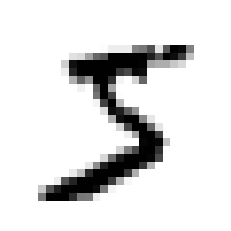

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# We will plot the first image X[0]
plt.imshow(X[0].reshape(28, 28), cmap=mpl.cm.binary) # reshape vector to matrix (image)
plt.axis("off")
plt.show()

In [4]:
print("First image label:", y[0])

First image label: 5


However, notice that labels are stored as stings.

In [5]:
type(y[0])

str

Because most ML algorithms require labes are numeric values, we will convert these strings to integers.

In [6]:
y = y.astype(np.uint8) # convert to integers
type(y[0])

numpy.uint8

The code below is just for illustration purposes. It creates a helper function to plot the images into a grid with `images_per_row` images per row. The output is a 10 x 10 grid containing the first 100 images (digits). 

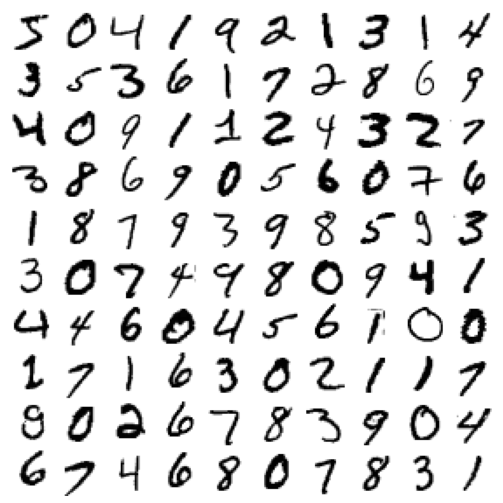

In [7]:
# Helper function to plot a set of images from the dataset
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9,9))
example_images = X[:100] # select the first 100 images
plot_digits(example_images, images_per_row=10) # plot 100 images, 10 per row
plt.show()

## Generate Training and Test set

The MINST dataset has already been curated such that the first 60,000 images are the training set, and the last 10,000 images are the test set. This gives roughly an 86:14 split for the training to test data. In general, you will have to generate your own splits and make sure the daata are sufficiently randomized (and stratified if necessary).

In [8]:
# Slit data into training and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

As we have seen, the dataset contains digits from 0 to 9, so there are potentially 10 classes. In this example we will simplify the classification tast by regucing the number of classes to two, so that we have a binary outcome. To do so we will define images corresponding to the digit 5 as one class (labeled as `True`), and all other digits will belong to the same second class (labeled as `False`).

In [9]:
# Define True/False binary classes by testing if digit = 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## Train a binary classifier

We will use a *Stochastic Gradient Descent (SGD)* classifier, which is a linear version of the very popular Support Vector Machine (SVM). For the time being, we will not go into the details of the SGD implementation as our goal here is to understand how to evaluation a classifier's performance.

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

We can now check how the trained classifier can be used to classify images. Let's look at the first image in the training set.

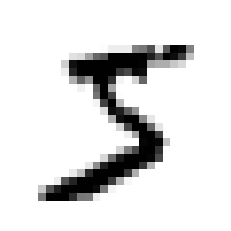

Is this image a 5 based on our classifier?  [ True]
Image label: True


In [11]:
# Plot first training image
plt.imshow(X_train[0].reshape(28, 28), cmap=mpl.cm.binary) # reshape vector to matrix (image)
plt.axis("off")
plt.show()
# Check if it has been classified as a 5
print("Is this image a 5 based on our classifier? ", sgd_clf.predict([X_train[0]]))
# Check its true label
print("Image label:", y_train_5[0])

What about the second image?

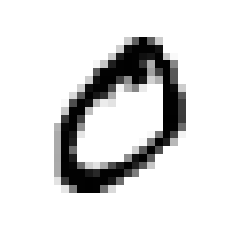

Is this image a 5 based on our classifier?  [False]
Image label: False


In [12]:
# Plot first training image
plt.imshow(X_train[1].reshape(28, 28), cmap=mpl.cm.binary) # reshape vector to matrix (image)
plt.axis("off")
plt.show()
# Check if it has been classified as a 5
print("Is this image a 5 based on our classifier? ", sgd_clf.predict([X_train[1]]))
# Check its true label
print("Image label:", y_train_5[1])

## Measuring classifier accuracy using cross-validation

We will perform K-fold cross-validation with 3 folds to compute the classifier accuracy in each fold. Accuracy is defined as the total number of prediction our model got right, that is:

$ \rm{Accuracy} = \frac{TP+TN}{N} $

where TP = True Positives, TN = True Negatives, N total number of samples.

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [14]:
print("Accuracy: ", scores)

Accuracy:  [0.95035 0.96035 0.9604 ]


Accuracy is above 90% across all folds. Does this mean we have an exceptional classifier? Let's compare our classifier with a trivial classifier that never assigns an image to the number 5 class. It can be coded as follows:

In [15]:
from sklearn.base import BaseEstimator

# Define class of Never5Classifier classifier
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

# Instantiate a Never5Classifier classifier
never_5_clf = Never5Classifier()

We will aplly this classifier to the data and perform the same K-fold cross-validation with 3 folds to compute its accuracy in each fold.

In [16]:
scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print("Accuracy: ", scores)

Accuracy:  [0.91125 0.90855 0.90915]


This trivial classifier has an accuracy of 90% ! Well, if we inspect more closely our dataset we will notice that about 10% of the images are number 5s, so this is not such a surprising result.

In [17]:
np.sum(y == 5)/np.size(y)

0.09018571428571429

This shows that accuracy is not the preferred performance measure for classifiers when datasets contain classes that are much more frequent than others (skewed datasets), like the `False` class in our case.

## Confusion Matrix

A better was to evaluate performance of a classifier is to compute the *confusion matrix*, which returns the numbers of all possible outcomes in a *decision matrix*:

|                     | Predicted Negative | Predicted Positive |
|         :--         |         :---:      |        :---:       |
| **Actual Negative** | TN                 | FP                 |
| **Actual Positive** | FN                 | TP                 |

where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives. To do this we could use the Test set, but we do not want to touch it as we are still potentially tweaking our model, and we should use the Test set only at the very end to evaluate our final model. We can use the cross-validation funstion `cross_val_predict`, which returns the actual predictions for each of the treaining set elements obtained during cross-training. Remember that while each element is used in multiple folds for training, it belongs to exactly one test set. `cross_val_predict` returns each element's predition when used in the test set.

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

The function `confusion_matrix` takes predictions and actiual labels as input and returns the `confusion matrix`.

In [19]:
from sklearn.metrics import confusion_matrix

cm  = confusion_matrix(y_train_5, y_train_pred)
cm = pd.DataFrame(cm)
cm.columns = ['Predicted Negative','Predicted Positive']
cm.index = ['Actual Negative', 'Actual Positive']
cm

Predicted Negative  Predicted Positive
Actual Negative               53892                 687
Actual Positive                1891                3530

We can now see that *accuracy* > 90% was not showing the entire picture, as this classifier has quite a few false positives and false negatives. A way to summarize these numbers is to define *Precision* and *Recall* of a classifier. *Precision* is the accuracy of the positive predictions:

$ \rm{Precision} = \frac{TP}{TP+FP} $

Notice that, if our classifier makes a single positive prediction which is correct all the time its *Precision* is 100% by definition, so we also want to look at the *Recall*, also known as *sensitivity* or *true positive rate (TPR)*:

$ \rm{Recall} = \frac{TP}{TP+FN} $

This is the ratio of positive instances that are correctly detected by the classifier. The functions `precision_score` and `recall_score` return those values for you.

In [20]:
from sklearn.metrics import precision_score, recall_score

print("Precision = ", precision_score(y_train_5, y_train_pred))
print("Recall = ", recall_score(y_train_5, y_train_pred))

Precision =  0.8370879772350012
Recall =  0.6511713705958311


Again, when our classifier claims an image represents a 5, it is correct `Precision%` of the time, and it only detects `Recall%` of the 5s. The weight you should give to *Precision* and *Recall* respectively depends on your application (e.g. does missing a positive have more important consequences?). However, when comparing across classifiers it is sometime useful to combine the two scores into a single value called the $F_1$ score, which is defined as the *harmonic mean* of precision and recall:

$ F_1 = \frac{2}{\frac{1}{\rm{precision}} + \frac{1}{\rm{recall}}} = \frac{TP}{TP+\frac{FN+FP}{2}}$

The $F_1$ score favors classifiers that have similar precision and recall. The $F_1$ score can be calculated by using the `f1_score` function as follows:

In [21]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

## Precision/Recall Trade-off

Classifiers in general work by computing the value of a _decision function_ on each instance and comparing that value to a threshold. If the vaule is above the threshold, the _decision threshold_, the instance is assigned to the positive class, otherwise it is assigned to the negative class. In the code block below, we look at one of the training instances. The default value of the threshold in the SGD model is `0`, and se see that the SGD value assigned to that instance is 2164>0, so the instance is classified as positive (`True`), hence we see it belongs to the True Positives. However, had we chosen a threshold of `8000`, it would have been classified asnegative (`False`), and it would have fallen in the False Negative category.

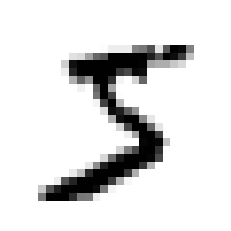

SGD value (score) =  [2164.22030239]
Prediction with threshold = 0:  [ True]
Prediction with threshold = 8000:  [False]


In [22]:
plt.imshow(X_train[0].reshape(28, 28), cmap=mpl.cm.binary) # reshape vector to matrix (image)
plt.axis("off")
plt.show()

y_scores = sgd_clf.decision_function([X_train[0]])
print('SGD value (score) = ', y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print('Prediction with threshold = 0: ', y_some_digit_pred)
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print('Prediction with threshold = 8000: ', y_some_digit_pred)

So as you can see, changing the _decision threshold_ affects the numbers in the _decision matrix_, hence the performance metrics of our classifier. This allows us to evaluate a classifier's performace in a more robust way, by looking for example at how _precision_ and _recall_ vary as we change the _decision threshold_. Increasing the threshold makes it harder for any instance to be classified as positive, so it reduces the number True Positives, but also the number of False Positives. Letls see how this translates into what happens to _precision_ and _recall_. The `precision_recall_curve` function can calculate this for you as a function of the varying threshold.

In [23]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

The code block below simply plots _precision_ and _recall_ as a function of the _decision threshold_.

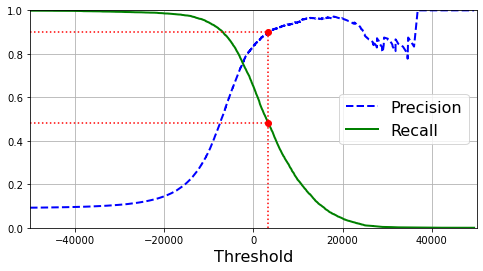

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

As expected, _recall_ decreases as the threshold increases. In fact we can write precision as:

$ \rm{Recall} = \frac{1}{1+\frac{FN}{TP}} $

When we increase the threshold, FN increases and TP decreases (it is harder to call a 5!), so the denominator in the expression above becomes larger. However, although _precision_ tends to increase as we increase the threshold, it somtimes can show a drop in value. We can see why by looking at its formula:

$ \rm{Precision} = \frac{1}{1+\frac{FP}{TP}} $

When we increase the threshold, FP decreases, just like TP, so the denominator can somtimes become smaller depending on the order of positive and negative instances as a function of the value of the _decision function_ for those instances.

#### Precision-Recall Curve

The most common way to visualize the data to assess a classifier's performance is with the _precision-recall_ curce, as shown in the code block below.

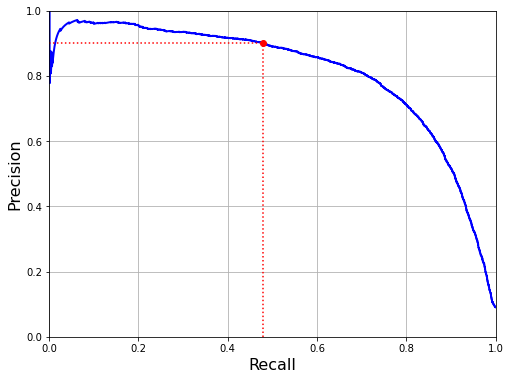

In [25]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

So, is this a good classifier for our problem? Well, we can certainly choose a threshold to acheive a high level of _precision_, say 90%. But that comes at the pretty big cost of having a _recall_ level of 48%, as we can see from the code block below.

In [26]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print('Threshold to use to achieve 90% precision = ', threshold_90_precision)
# Make predictions based on the selected threshold
y_train_pred_90 = (y_scores >= threshold_90_precision)
print('Precision = ', precision_score(y_train_5, y_train_pred_90))
print('Recall = ', recall_score(y_train_5, y_train_pred_90))

Threshold to use to achieve 90% precision =  3370.0194991439557
Precision =  0.9000345901072293
Recall =  0.4799852425751706


## The Receiver Operating Characteristic (ROC) curve

A different but very common way of assessing the classifier's performance is to look at a variant of the _precision-recall_ curve called the Receiver Operating Characteristic (ROC) curve. It is computed by varying the _decision threshold_ in the same way as with the _precision-recall_ curve, but is plots the _recall_ (here ususally referred to as True Positive Rate or TPR) as a function of the False Positive Rate (FPR), which is defined as the fraction of negative incorrectly classified and can be computed as:

$\rm{FPR} = \frac{FP}{TN+FP}$

Notice that the FPR can be written as 1 - sensitivity, where the specificity (also knwon as True Negarive Rate, or TNR) is the fraction of negatives incorrectly classified as positives:

$\rm{TNR} = \frac{TN}{TN+FP}$

You can use the `roc_curve` function to generate a ROC curve, as demonstated in the cod blocks below.

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

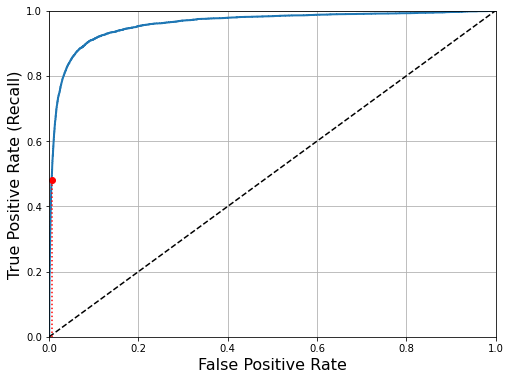

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.show()

Another important metric that is used to assess the overall perofmance of a classifier is the area under the ROC curve, called AUC. The dotted line above correpond to the performance of a classifier that flips a coin to make decision (random), and its AUC = 0.5. A perfect classifier that always makes the right decision would have a ROC curve with $\rm{TPR} =1$ for all $\rm{FPR} \ge 0$, and an $AUC = 1$. Your classifier will be somewhere in between these two extremes. For our current classifier, we can compute the AUC by using the `roc_auc_score` function.

In [29]:
from sklearn.metrics import roc_auc_score

print('AUC = ', roc_auc_score(y_train_5, y_scores))

AUC =  0.9604938554008616


In [30]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

We can use the ROC curve and AOC to compare performance of classifiers on  the same training set. Belos we train a Random Forest on the same problem and plot its ROC curve as compared to the SGD ROC curve. 

In [31]:
y_scores_forest = y_probas_forest[:, 1] # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

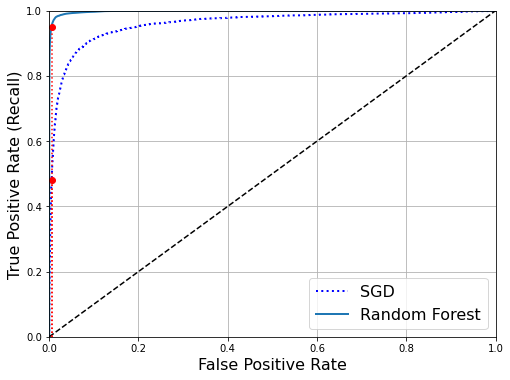

In [32]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

You can see that the Random Forest ROC curve is closer to the prefect classifier. Tjis is reflected in a much higher AUC. Notice also that it can achieve 99% _precision_ at 87% _recall_.

In [33]:
print('AUC = ', roc_auc_score(y_train_5, y_scores_forest))

y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

print('Precision = ', precision_score(y_train_5, y_train_pred_forest))
print('Recall = ', recall_score(y_train_5, y_train_pred_forest))

AUC =  0.9983436731328145
Precision =  0.9905083315756169
Recall =  0.8662608374838591


## Multiclass Classification

A natural extension to binary classification is multiclass classification. The goal is to assign instances to more than 2 classes. We will show this by using a Support Vector Machine (a binary classifier) with a one-versus-one (OvO) strategy.

In [34]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([X_train[0]])

array([5], dtype=uint8)

Now we can take any instance and decide where it belongs. For example, the first training instance scores for all binary classifiers are as follows:

In [35]:
some_digit_scores = svm_clf.decision_function([X_train[0]])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

The highest score is indeed the one corresponding to class 5, as shown below:

In [36]:
np.argmax(some_digit_scores)

5

In [37]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [38]:
svm_clf.classes_[5]

5

SVC used the OvO strategy by defaylt, but you have control on what strategy you want to use via the `OneVsOneClassifier` or `OneVsRestClassifier` classes. You can simply create an instance of your classifier in one of these two classes (use class constructor):

In [39]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([X_train[0]])

array([5], dtype=uint8)

In [40]:
len(ovr_clf.estimators_)

10

Training classifiers that can natively handle more than two classes, sich as the SGD or Random Forest, ese even simpler, as you do not have to worry about what strategy to use. For example for an SGD classifier:

In [41]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([X_train[0]])

array([3], dtype=uint8)

In [42]:
sgd_clf.decision_function([X_train[0]])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

Notice that some data preprocessing can improve classifier performance, such as, for example, data scaling, which in this case increase performance to an accuracy above 89%.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Error Analysis

Error analysis can be done by using a _confusion matrix_. It can be computed by making predictions with `cross_val_predict`, then calling the `confusion_matrix` function:

In [45]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

Next, we plot the matrix of to visualize the results:

In [46]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

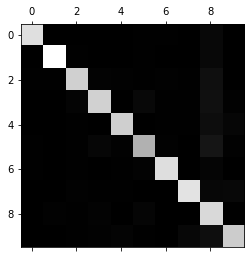

In [47]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

The classifier is performing pretty well (bright diaginal) but is is not clear from the picture what types of error we are making, so we will normalize by the number of images in each corresponding class, and fill the diagonal with zeros to keep only the errors:

In [48]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

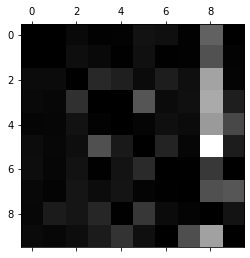

In [49]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

We see that some images tend to be miscallified by 8 (vertical light column), but that 8s do not tend to be misclassified (dark horidontal row).

It is good practice to look at the actual misclassifications to try to understand how to fix the problem. Here are exmples of correclty or misclassified a 3s and 5s:

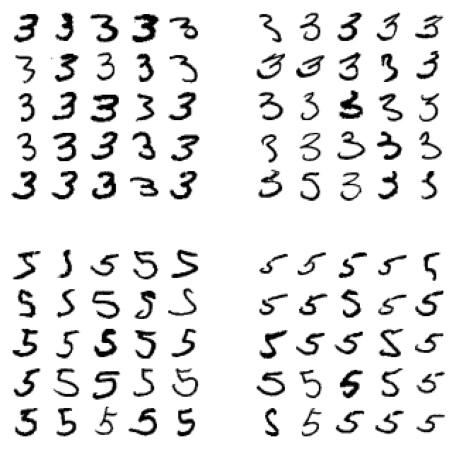

In [50]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## Multilabel Classification

In [51]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [52]:
knn_clf.predict([X_train[0]])

array([[False,  True]])

In [53]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

## Multioutput Clasification

In [54]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

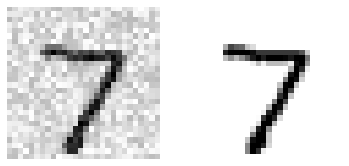

In [55]:
some_index = 0
plt.subplot(121);
plt.imshow(X_test_mod[some_index].reshape(28, 28), cmap=mpl.cm.binary) # reshape vector to matrix (image)
plt.axis("off")

plt.subplot(122);
plt.imshow(y_test_mod[some_index].reshape(28, 28), cmap=mpl.cm.binary) # reshape vector to matrix (image)
plt.axis("off")

plt.show()

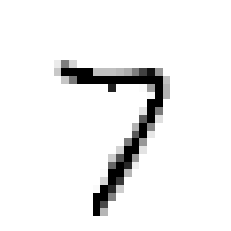

In [56]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])

plt.imshow(clean_digit.reshape(28, 28), cmap=mpl.cm.binary) # reshape vector to matrix (image)
plt.axis("off")

plt.show()

## Improve Classifier with Grid Search
Models contain marameters that can effect their performance. It is common to use the default patameters, but they are not guarantied to be the best ones. A common approach it to scan many combinations of these parameters and pick the one that performs best. There are different approachees to do this.

Here we show the use of the `GridSearchCV` function. In the example below, we test two strategies for the `'weights'` parameter (`"uniform"` and `"distance"`) and three values for the `'n_neighbors'` parameter (`[3, 4, 5]`), for a total of 6 combinations. The `GridSearchCV` function uses cross-validation to compute the score for each combination. We will use a 5-fold cross-valitations, which means the classifier is run 5 x 6 = 30 times. This can be very time consuming, as each run can take tens of minutes, so the total run time would be hours. In practice, this can be done on a parallel computer where each combination and fold is run on a separate core. Here, I just report the output of a run that took more than 17 hours. If you want to try this out, copy the code example from this Markdown block into a Python block and run it.

#### Perform the grid search

```python
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)
```

#### Screen output
This is the output you would get as a result of setting the parameter `verbose=3` in the `GridSearchCV` call:

```
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=11.5min
[CV] n_neighbors=3, weights=uniform ..................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.5min remaining:    0.0s
[CV] ..... n_neighbors=3, weights=uniform, score=0.971, total=720.8min
[CV] n_neighbors=3, weights=uniform ..................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 732.3min remaining:    0.0s
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=11.5min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=11.3min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.970, total=11.3min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=11.4min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=11.4min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=11.3min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.970, total=11.3min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.971, total=11.4min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.969, total=11.4min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.968, total=11.4min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.968, total=11.4min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.967, total=11.4min
[CV] n_neighbors=4, weights=uniform ..................................
[CV] ...... n_neighbors=4, weights=uniform, score=0.970, total=11.4min
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.973, total=11.5min
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.972, total=11.4min
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.970, total=11.4min
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.971, total=11.4min
[CV] n_neighbors=4, weights=distance .................................
[CV] ..... n_neighbors=4, weights=distance, score=0.972, total=11.4min
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.970, total=11.4min
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.970, total=11.6min
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.969, total=11.1min
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.968, total=11.3min
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.969, total=11.3min
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.970, total=11.3min
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.971, total=11.3min
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.970, total=11.3min
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.969, total=11.3min
[CV] n_neighbors=5, weights=distance .................................
[CV] ..... n_neighbors=5, weights=distance, score=0.971, total=11.2min
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 1050.5min finished

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)
```

The `grid_search` object contains the parameters that perfomred best:

```python
grid_search.best_params_
```

```
{'n_neighbors': 4, 'weights': 'distance'}
```

Which give a score of:

```python
grid_search.best_score_
```

```
0.9716166666666666
```

The accuracy of this model can be computed by using the test set:

```python
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)
```

```
0.9714
```

## Improve Classification with Data Augmentation

In [57]:
from scipy.ndimage.interpolation import shift

In [58]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

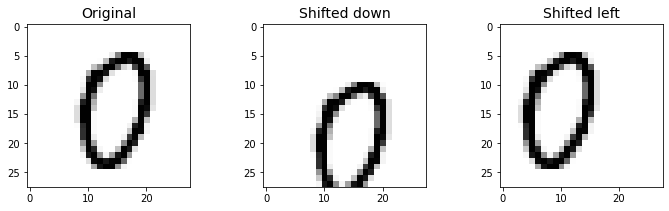

In [59]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [60]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [61]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [62]:
#knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [63]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [66]:
y_pred = knn_clf.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9763

## Appendix: Summary table of terms and abbreviations


| Name | Symbol | Description | Formula | Synonyms |
| :-- | :-- | :-- | :-- | :-- |
| **True Positive** | TP | Correctly classified as positive | | |
| **True Negative** | TN | Correcly classified as negative | | |
| **False Positive** | FP | Incorrectly classified as positive | | |
| **False Negative** | FN | Incorrectly classified as negative | | |
| **Precision** | | Fraction of positive calls that were actually positive | $\frac{TP}{TP+FP} $ | |
| **True positive rate** | TPR | Fraction of positive correctly classified | $\frac{TP}{TP+FN} $ | *recall, sensitivity* |
| **True negative rate**| TNR | Fraction of negative correctly classified | $\frac{TN}{TN+FP}$ | *specificity* |
| **False Positive Rate** | FPR | Fraction of negative incorrectly classified | $\frac{FP}{TN+FP}$  | |

Note: FPR = 1-specificity